# Line detection, contours, HOG

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
%matplotlib inline

### Line Detection on Sudoku.png

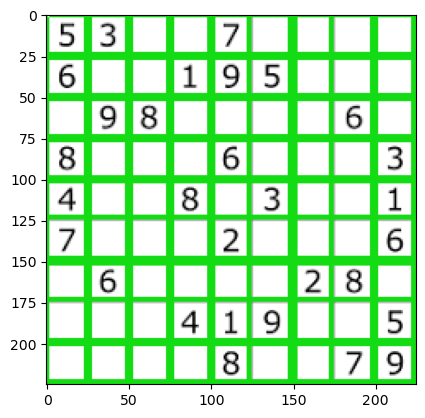

In [2]:
image = cv2.imread("sudoku.png")
# convert to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# perform edge detection
edges = cv2.Canny(grayscale, 30, 100)
# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 10)
# iterate over the output lines and draw them
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image, (x1, y1), (x2, y2), (20, 220, 20), 2)

# show the image
plt.imshow(image)
plt.show()

Using hough lines technique to detect lines in the image was able to capture the grid of the sudoku board but we can see some overlapping lines that appear thicker.

### Circle detection on colonies-02.tif

Number of circles detected: 62


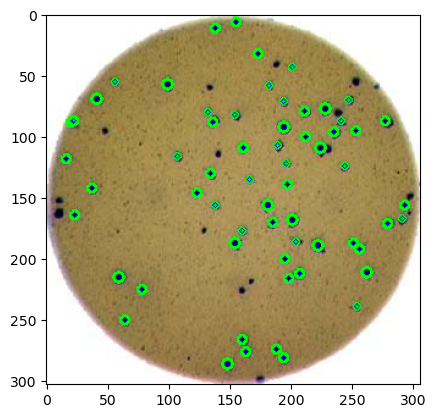

In [3]:
# load the image
img = cv2.imread("colonies-02.tif")
# convert BGR to RGB to be suitable for showing using matplotlib library
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# make a copy of the original image
cimg = img.copy()
# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply a blur using the median filter
img = cv2.medianBlur(img, 5)
# finds the circles in the grayscale image using the Hough transform
circles = cv2.HoughCircles(image=img, method=cv2.HOUGH_GRADIENT, dp=0.9, 
                            minDist=2, param1=100, param2=8, maxRadius=5)
for co, i in enumerate(circles[0, :], start=1):
    # draw the outer circle in green
    cv2.circle(cimg,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle in red
    cv2.circle(cimg,(int(i[0]),int(i[1])),2,(0,0,255),1)
# print the number of circles detected
print("Number of circles detected:", co)
# save the image, convert to BGR to save with proper colors
# cv2.imwrite("coins_circles_detected.png", cimg)
# show the image
plt.imshow(cimg)
plt.show()

We were able to detect 62 circles. There are some colonies of bacteria that the algorithm was unable to detect. This may be because they are not exactly circular, or the parameter values need to be adjusted to capture them.

### Detect the contours on Contours.png

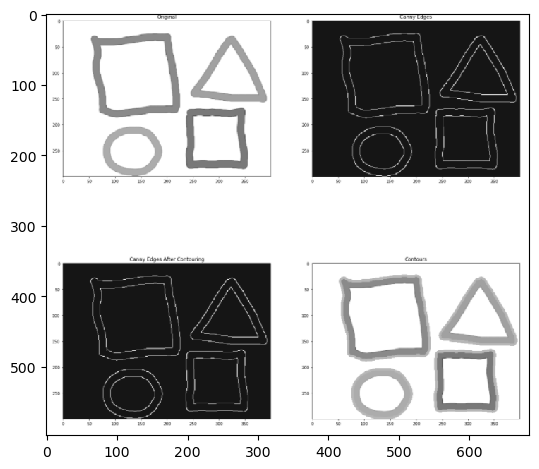

In [6]:
#reading the image 
image = imread('Contours.png',as_gray=True)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)
imshow(image, cmap='gray')

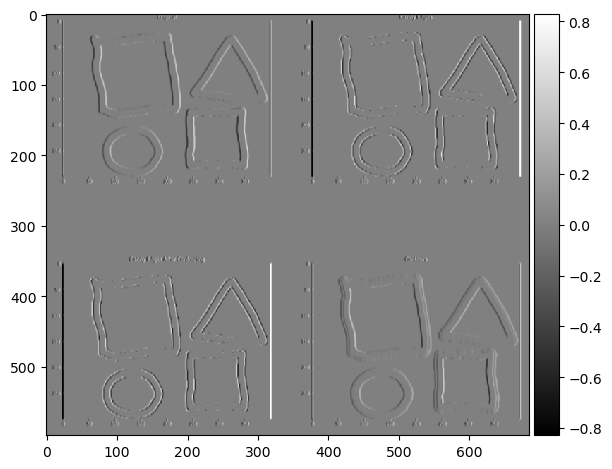

In [7]:
imshow(edges_prewitt_vertical, cmap='gray')

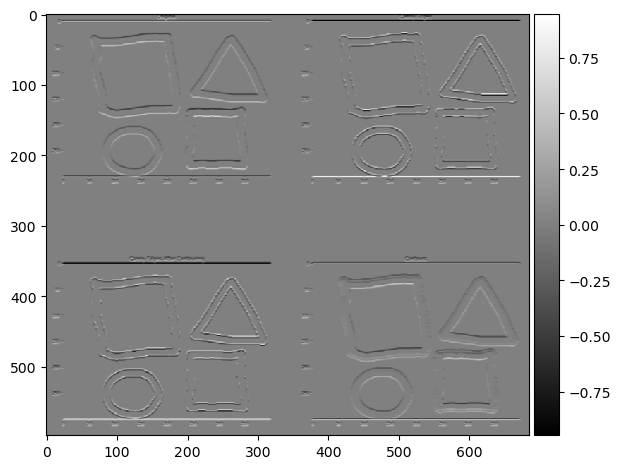

In [5]:
imshow(edges_prewitt_horizontal, cmap='gray')

Both horizontal and vertical edge detection was able to detect the contour of the shapes in the image. We can see that vertical edge detection has darker, well-defined vertical lines whereas horizontal edge detection picks up horizontal lines better.

### Use HOG on shapes-01.jpg

HOG - histogram of oriented gradients

(2457, 3068, 3)


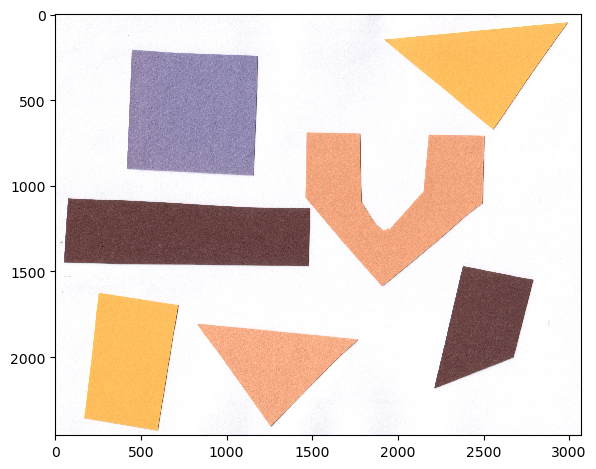

In [9]:
#reading the image
img = imread('shapes-01.jpg')
imshow(img)
print(img.shape)

#### 8x8 pixels per cell:

(128, 64, 3)


C:\Users\user\AppData\Local\Temp\ipykernel_7556\4035217457.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


(3780,)

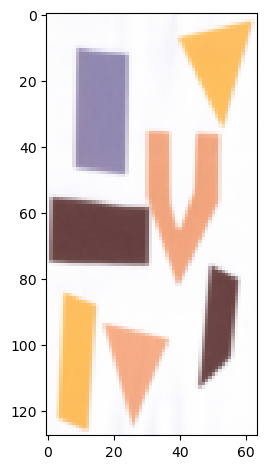

In [37]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape

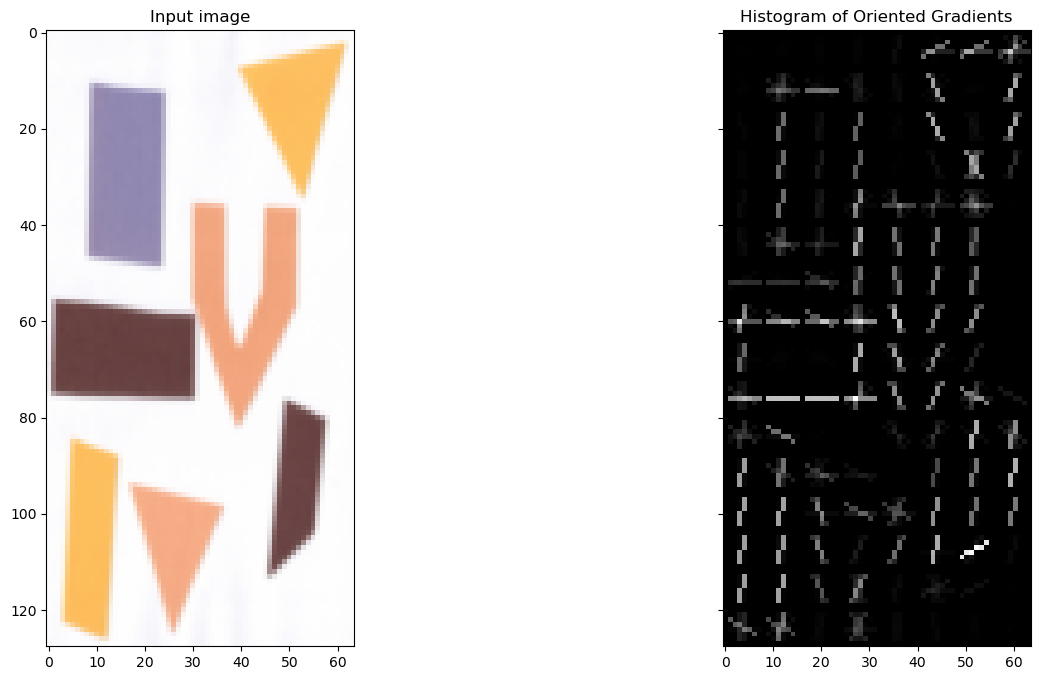

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

HOG descriptor allows us to detect edges and also see the edge direction based on localized portions. When we use 8x8 pixels per cell, it is hard to distinguish between some of the shapes that are closer together. Additionally, the non-rectangular shapes are harder to depict from the histogram of oriented gradients, such as the triangle and trapezoid. Let's try reducing the size of the localized portions to see if we can extract more details from the image.

#### 4x4 pixels per cell:

(128, 64, 3)


C:\Users\user\AppData\Local\Temp\ipykernel_7556\2851667912.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4),


(16740,)

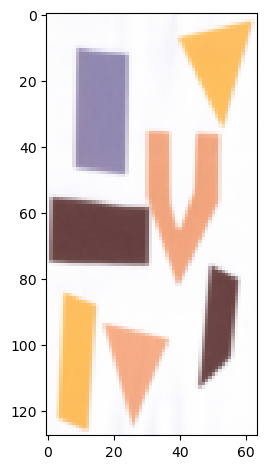

In [41]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape

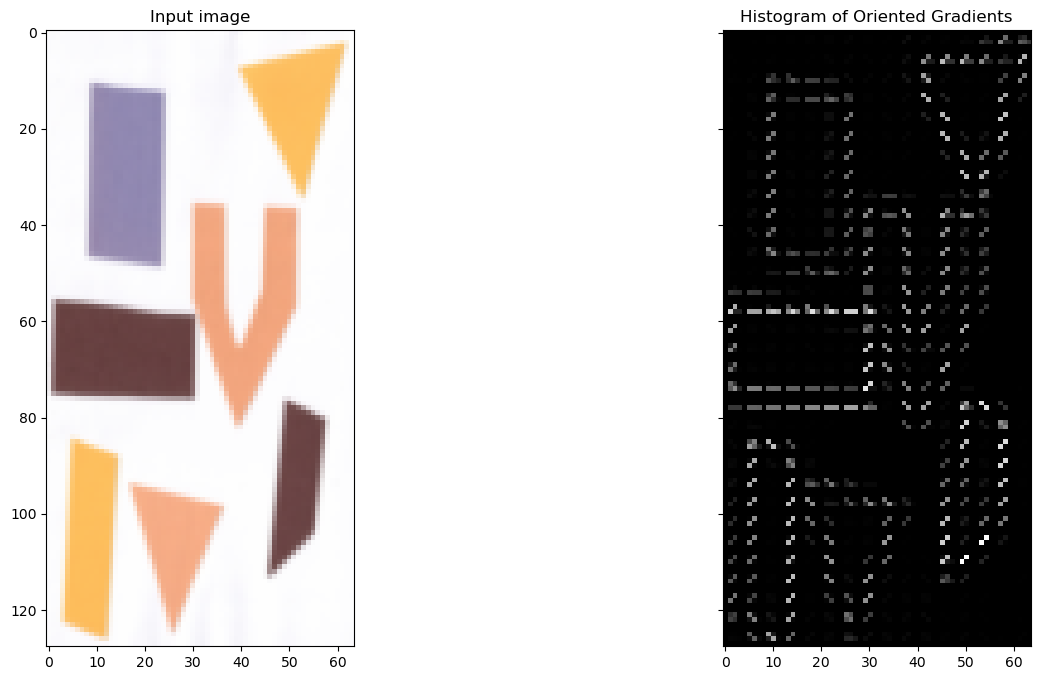

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

Reducing the pixels per cell allows us to see finer details in the shapes. The triangles are easier to see and the shapes are more distinguishable from one another.